## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Data 
Download day.csv

## Data Dictionary
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Step 1: Reading and Understanding the Data
Import NumPy, Pandas, Seaborn, Sklearn, Statsmodel libraries and read data

In [765]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [766]:
# read and check the head of the data
bikedata = pd.read_csv("day.csv")
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [767]:
bikedata.shape

(730, 16)

In [768]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [769]:
# check descriptive info
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [770]:
# taking value_counts() to determine continuous and categorical variables
for colmn in bikedata:
    print(bikedata[colmn].value_counts(), '\n\n')

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64 


01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 


3    188
2    184
1    180
4    178
Name: season, dtype: int64 


0    365
1    365
Name: yr, dtype: int64 


1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 


0    709
1     21
Name: holiday, dtype: int64 


6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 


1    499
0    231
Name: workingday, dtype: int64 


1    463
2    246
3     21
Name: weathersit, dtype: int64 


26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
2

In [771]:
# duplicate check
bikedata_cp = bikedata.copy()
bikedata_cp.drop_duplicates(subset=None, inplace=True)
bikedata_cp.shape

(730, 16)

### Data Summary
- There are no missing/null values in column
- Except one column, all are either float or int
- There are no duplicate rows in dataset
- Identified following columns as categorical
    - season
    - yr
    - mnth
    - holiday
    - weekday
    - workingday
    - weathersit
- Identified following columns as continuous
    - temp
    - atemp
    - hum
    - windspeed
    - casual
    - registered
    - cnt
    

## Step 2: Visualizing the Data

- Objective of this step is to identify variables having strong association with outcome variable(cnt)

Will use seaborn and matplotlib

### Visualizing continuous variables

<Figure size 4000x1000 with 0 Axes>

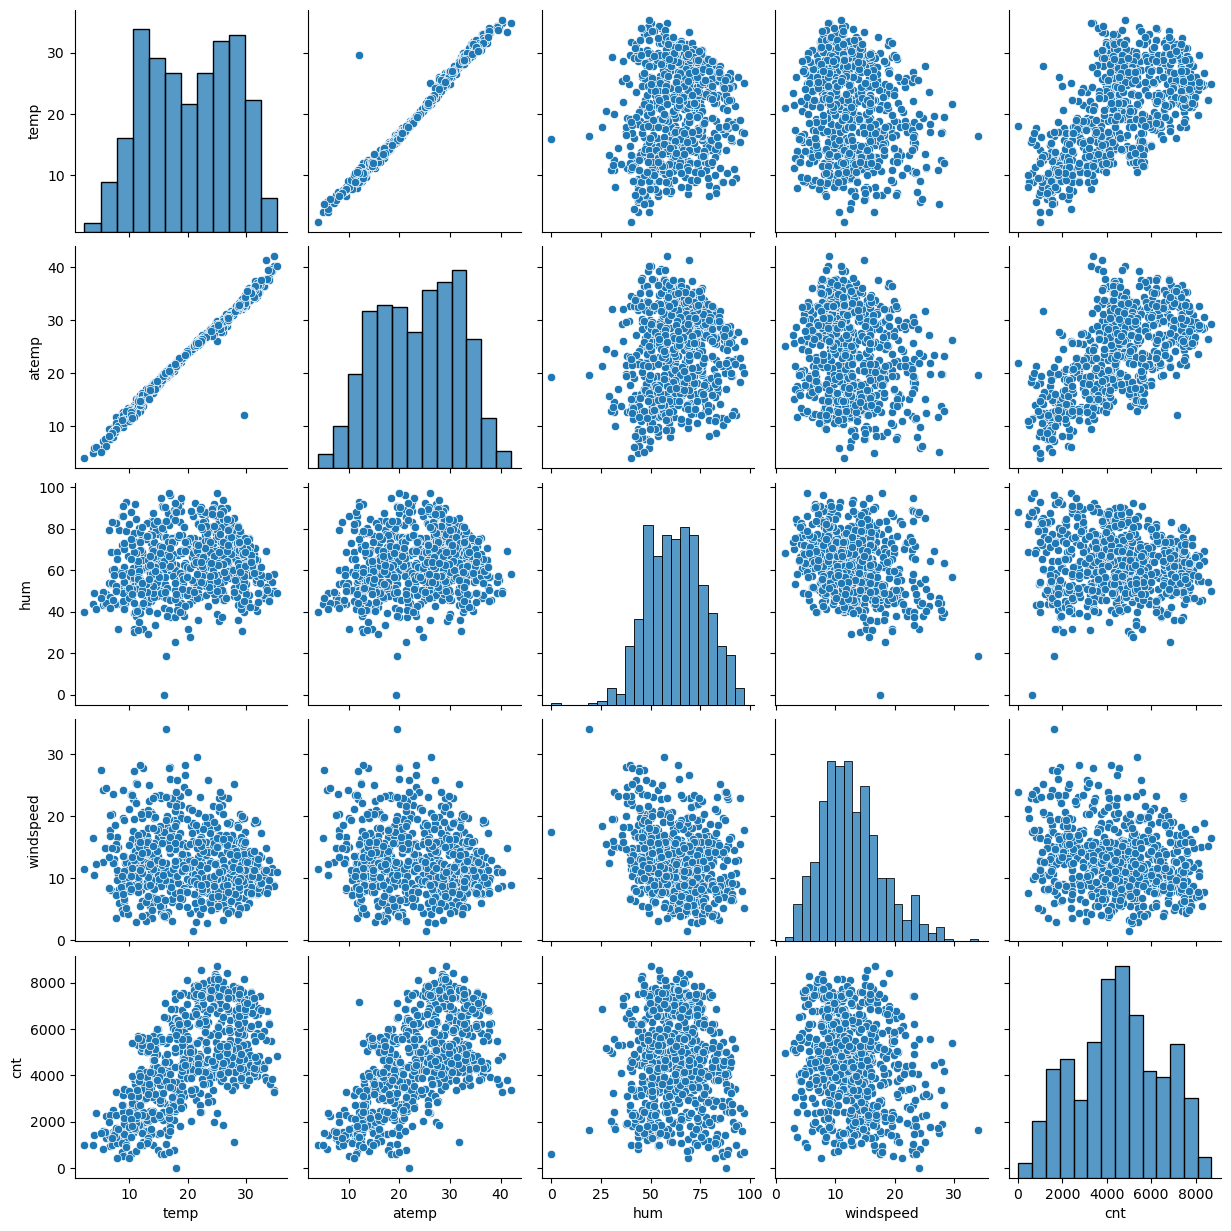

In [772]:
# plotting histogram to check numeric variables
plt.figure(figsize=(40,10))
sns.pairplot(bikedata[['temp','atemp','hum','windspeed','cnt']])
plt.show()

We can visualize decent linear relationship between cnt, temp and atemp. Also seeing almost linear relationship between temp and atemp.

### Visualizing Categorical Variables
Making boxplot for below veriables:
- season
- yr
- mnth
- weathersit
- workingday
- weekday
- holiday


<Axes: xlabel='holiday', ylabel='cnt'>

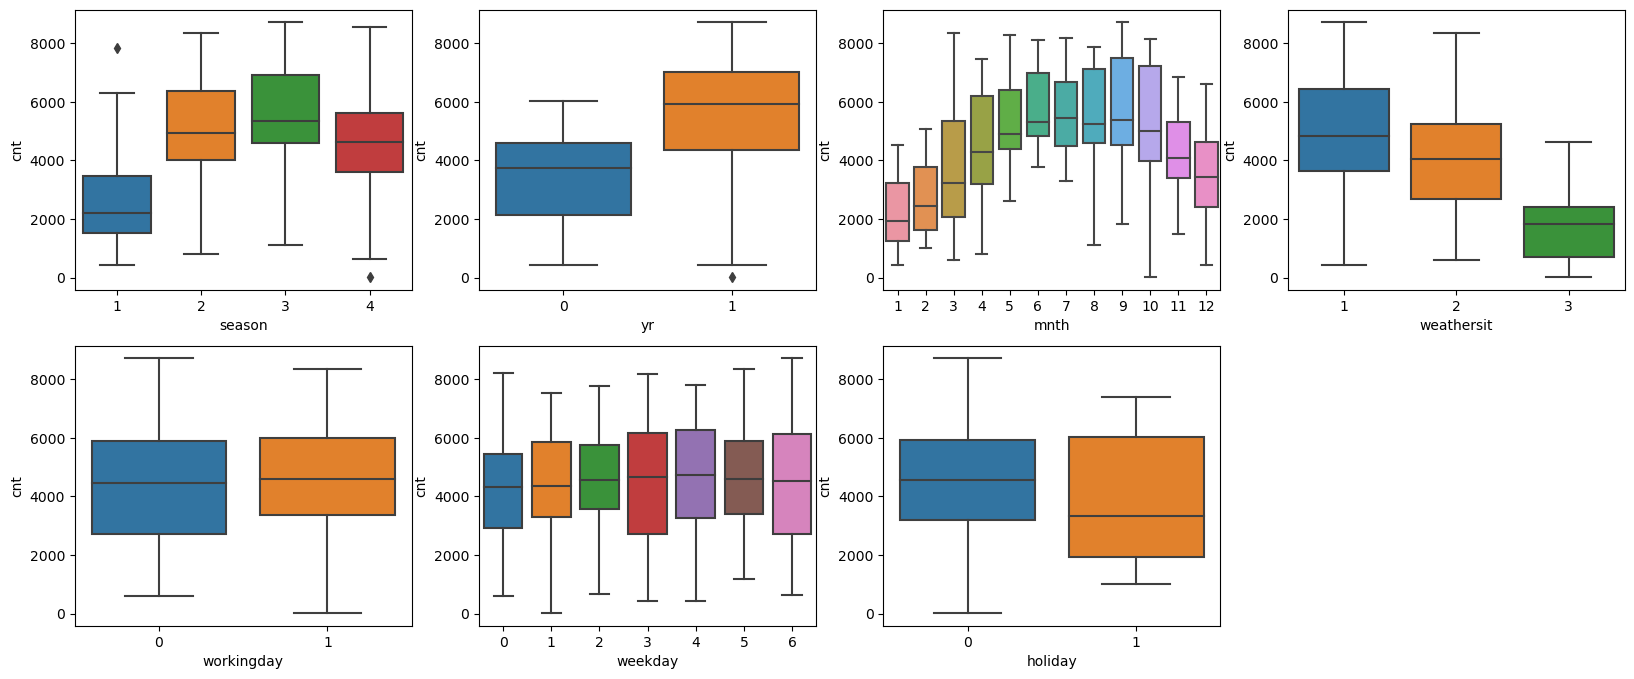

In [773]:
# visualizing categorical variables
plt.figure(figsize=(20,8))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=bikedata)

plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=bikedata)

plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=bikedata)

plt.subplot(2,4,4)
sns.boxplot(x='weathersit', y='cnt', data=bikedata)

plt.subplot(2,4,5)
sns.boxplot(x='workingday', y='cnt', data=bikedata)

plt.subplot(2,4,6)
sns.boxplot(x='weekday', y='cnt', data=bikedata)

plt.subplot(2,4,7)
sns.boxplot(x='holiday', y='cnt', data=bikedata)



### Observations

- season : season-3 has median over 5000 followed by season-2 and season-4. So season can be good predictor.
- yr : Significant improvement in ct in 2019. So yr can be a good predictor.
- mnth : Seeing 4000+ median values for month 5,6,7,8,9, and 10. So mnth has trend in cnt and can be a good predictor.
- weathersit : For weathersit-1, seeing median close to 5000 and followed by 2 and 3. This indiactes it show some trend over bookings.
- weekday : It is showing very close values across all levels. So weekday may not be a good predictor.
- wrokingday : Seeing slightly more booking in working day over weekend or holiday. So it may have some trend.

## Step 3 : Data Preparation

- "instant" column has no significance. Dropping it.
- We have "yr" and "mnth" column already present in dataset. So dropping "dteday" column.
- "casual" and "registered" : Both these column contains category of the customers. Our objective is to find total count but not based on any category. We have separate cnt column which contains summation of these two values. So dropping casual and registered.

- weathersit, season, mnth and weekday contain numerical values and those values represent sepcific lables. Those do not have any specific order. So converting it to string categorical column. Labels are as below :

- weathersit :: 
    - 1 : Clear, Few clouds, Partly cloudy, Partly cloudy (clear)
    - 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (mist)
	- 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (lightrainsnow)
    - 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (heavyrainsnow)
        
- season :: 
    - 1 : spring
    - 2 : summer 
    - 3 : fall 
    - 4 : winter
          
- mnth ::
    - month ( 1 to 12)
- weekday ::
    - 0 to 6 (assuming 0 as sun, 1 as mon, 2 as tue, 3 as wed.....)


In [774]:
# Drop redundant column
bikedata = bikedata.drop(['instant','dteday','casual', 'registered'], axis=1)

In [775]:
# convert weather labels to string values
def weather_convert_fun(x):
    if x ==1:
        return "clear"
    elif x==2:
        return "mist"
    elif x==3:
        return "lightrainsnow"
    else:
        return "heavyrainsnow"

bikedata['weathersit'] = bikedata['weathersit'].apply(lambda x: weather_convert_fun(x))

In [776]:
# convert season labels to string values
def season_convert_fun(x):
    if x ==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"

bikedata['season'] = bikedata['season'].apply(lambda x: season_convert_fun(x))

In [777]:
# convert mnth labels to string values
def mnth_convert_fun(x):
    if x ==1:
        return "jan"
    elif x==2:
        return "feb"
    elif x==3:
        return "mar"
    elif x==4:
        return "apr"
    elif x==5:
        return "may"
    elif x==6:
        return "jun"
    elif x==7:
        return "july"
    elif x==8:
        return "aug"
    elif x==9:
        return "spe"
    elif x==10:
        return "oct"
    elif x==11:
        return "nov"
    else:
        return "dec"

bikedata['mnth'] = bikedata['mnth'].apply(lambda x: mnth_convert_fun(x))

In [778]:
# convert weekday labels to string values
def weekday_convert_fun(x):
    if x == 0:
        return "sun"
    elif x ==1:
        return "mon"
    elif x==2:
        return "tue"
    elif x==3:
        return "wed"
    elif x==4:
        return "thu"
    elif x==5:
        return "fri"
    else:
        return "sat"


bikedata['weekday'] = bikedata['weekday'].apply(lambda x: weekday_convert_fun(x))

In [779]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy variables

Now weathersit has 4 string values. Need to convert those to integer. Similarly season also has 4 string values. We will convert those to integer values.

In [780]:
# Create dummy variable for weathersit
weatherstatus = pd.get_dummies(bikedata['weathersit'])
weatherstatus.head()

,clear,lightrainsnow,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


clear         = 1 0 0
lightrainsnow = 0 1 0
mist          = 0 0 1
heavyrainsnow = 0 0 0

In [781]:
# Add weatherstatus to the original dataframe
bikedata = pd.concat([bikedata, weatherstatus], axis = 1)
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,clear,lightrainsnow,mist
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,0,0,1
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,0,0,1
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [782]:
# Dropping weathersit column as we have created dummies for it
bikedata.drop(['weathersit'], axis=1, inplace=True)
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear,lightrainsnow,mist
0,spring,0,jan,0,sat,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1
1,spring,0,jan,0,sun,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1
2,spring,0,jan,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [783]:
# Create dummy variable for season

seasonname = pd.get_dummies(bikedata['season'])
seasonname.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


We do not need all 4 columns. We can drop one column. Values can be identified by three columns as follows ::
- spring :: 1 0 0
- summer :: 0 1 0
- winter :: 0 0 1
- fall   :: 0 0 0


In [784]:
seasonname = pd.get_dummies(bikedata['season'], drop_first=True)
seasonname.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [785]:
# Add seasonname to the original dataframe
bikedata = pd.concat([bikedata, seasonname], axis = 1)
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear,lightrainsnow,mist,spring,summer,winter
0,spring,0,jan,0,sat,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0
3,spring,0,jan,0,tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0
4,spring,0,jan,0,wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0


In [786]:
# Dropping season column as we have created dummies for it
bikedata.drop(['season'], axis=1, inplace=True)
bikedata.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear,lightrainsnow,mist,spring,summer,winter
0,0,jan,0,sat,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,1,0,0
1,0,jan,0,sun,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,1,0,0
2,0,jan,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0
3,0,jan,0,tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0
4,0,jan,0,wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0


In [787]:
# Create dummy variable for mnth
mnthname = pd.get_dummies(bikedata['mnth'], drop_first=True)
mnthname.head()

,aug,dec,feb,jan,july,jun,mar,may,nov,oct,spe
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [788]:
# Add mnthname to the original dataframe
bikedata = pd.concat([bikedata, mnthname], axis = 1)
bikedata.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,july,jun,mar,may,nov,oct,spe
0,0,jan,0,sat,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,sun,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,tue,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,wed,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [789]:
# Dropping mnth column as we have created dummies for it
bikedata.drop(['mnth'], axis=1, inplace=True)
bikedata.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear,...,dec,feb,jan,july,jun,mar,may,nov,oct,spe
0,0,0,sat,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [790]:
# Create weekday variable for mnth
weekdayname = pd.get_dummies(bikedata['weekday'], drop_first=True)
weekdayname.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [791]:
# Add weekdayname to the original dataframe
bikedata = pd.concat([bikedata, weekdayname], axis = 1)
bikedata.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,clear,...,may,nov,oct,spe,mon,sat,sun,thu,tue,wed
0,0,0,sat,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,sun,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [792]:
# Dropping weekday column as we have created dummies for it
bikedata.drop(['weekday'], axis=1, inplace=True)
bikedata.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,clear,lightrainsnow,...,may,nov,oct,spe,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [793]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   clear          730 non-null    uint8  
 9   lightrainsnow  730 non-null    uint8  
 10  mist           730 non-null    uint8  
 11  spring         730 non-null    uint8  
 12  summer         730 non-null    uint8  
 13  winter         730 non-null    uint8  
 14  aug            730 non-null    uint8  
 15  dec            730 non-null    uint8  
 16  feb            730 non-null    uint8  
 17  jan            730 non-null    uint8  
 18  july      

In [794]:
bikedata.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'clear', 'lightrainsnow', 'mist', 'spring', 'summer', 'winter',
       'aug', 'dec', 'feb', 'jan', 'july', 'jun', 'mar', 'may', 'nov', 'oct',
       'spe', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

## Step 4: Splitting data into test and train set

In [795]:
np.random.seed(0)
df_train, df_test = train_test_split(bikedata, train_size=0.7, test_size=0.3, random_state=100)

In [796]:
df_train.shape

(510, 31)

In [797]:
df_test.shape

(219, 31)

### Rescaling
Scaing following continuous variables
- temp
- atemp
- hum
- windspeed
- cnt

In [798]:
scaler = MinMaxScaler()

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,clear,lightrainsnow,...,may,nov,oct,spe,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,1,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,1,0,0,0,0


In [799]:
# checking values after scaling
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,clear,lightrainsnow,...,may,nov,oct,spe,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.627451,0.029412,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.483958,0.169124,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


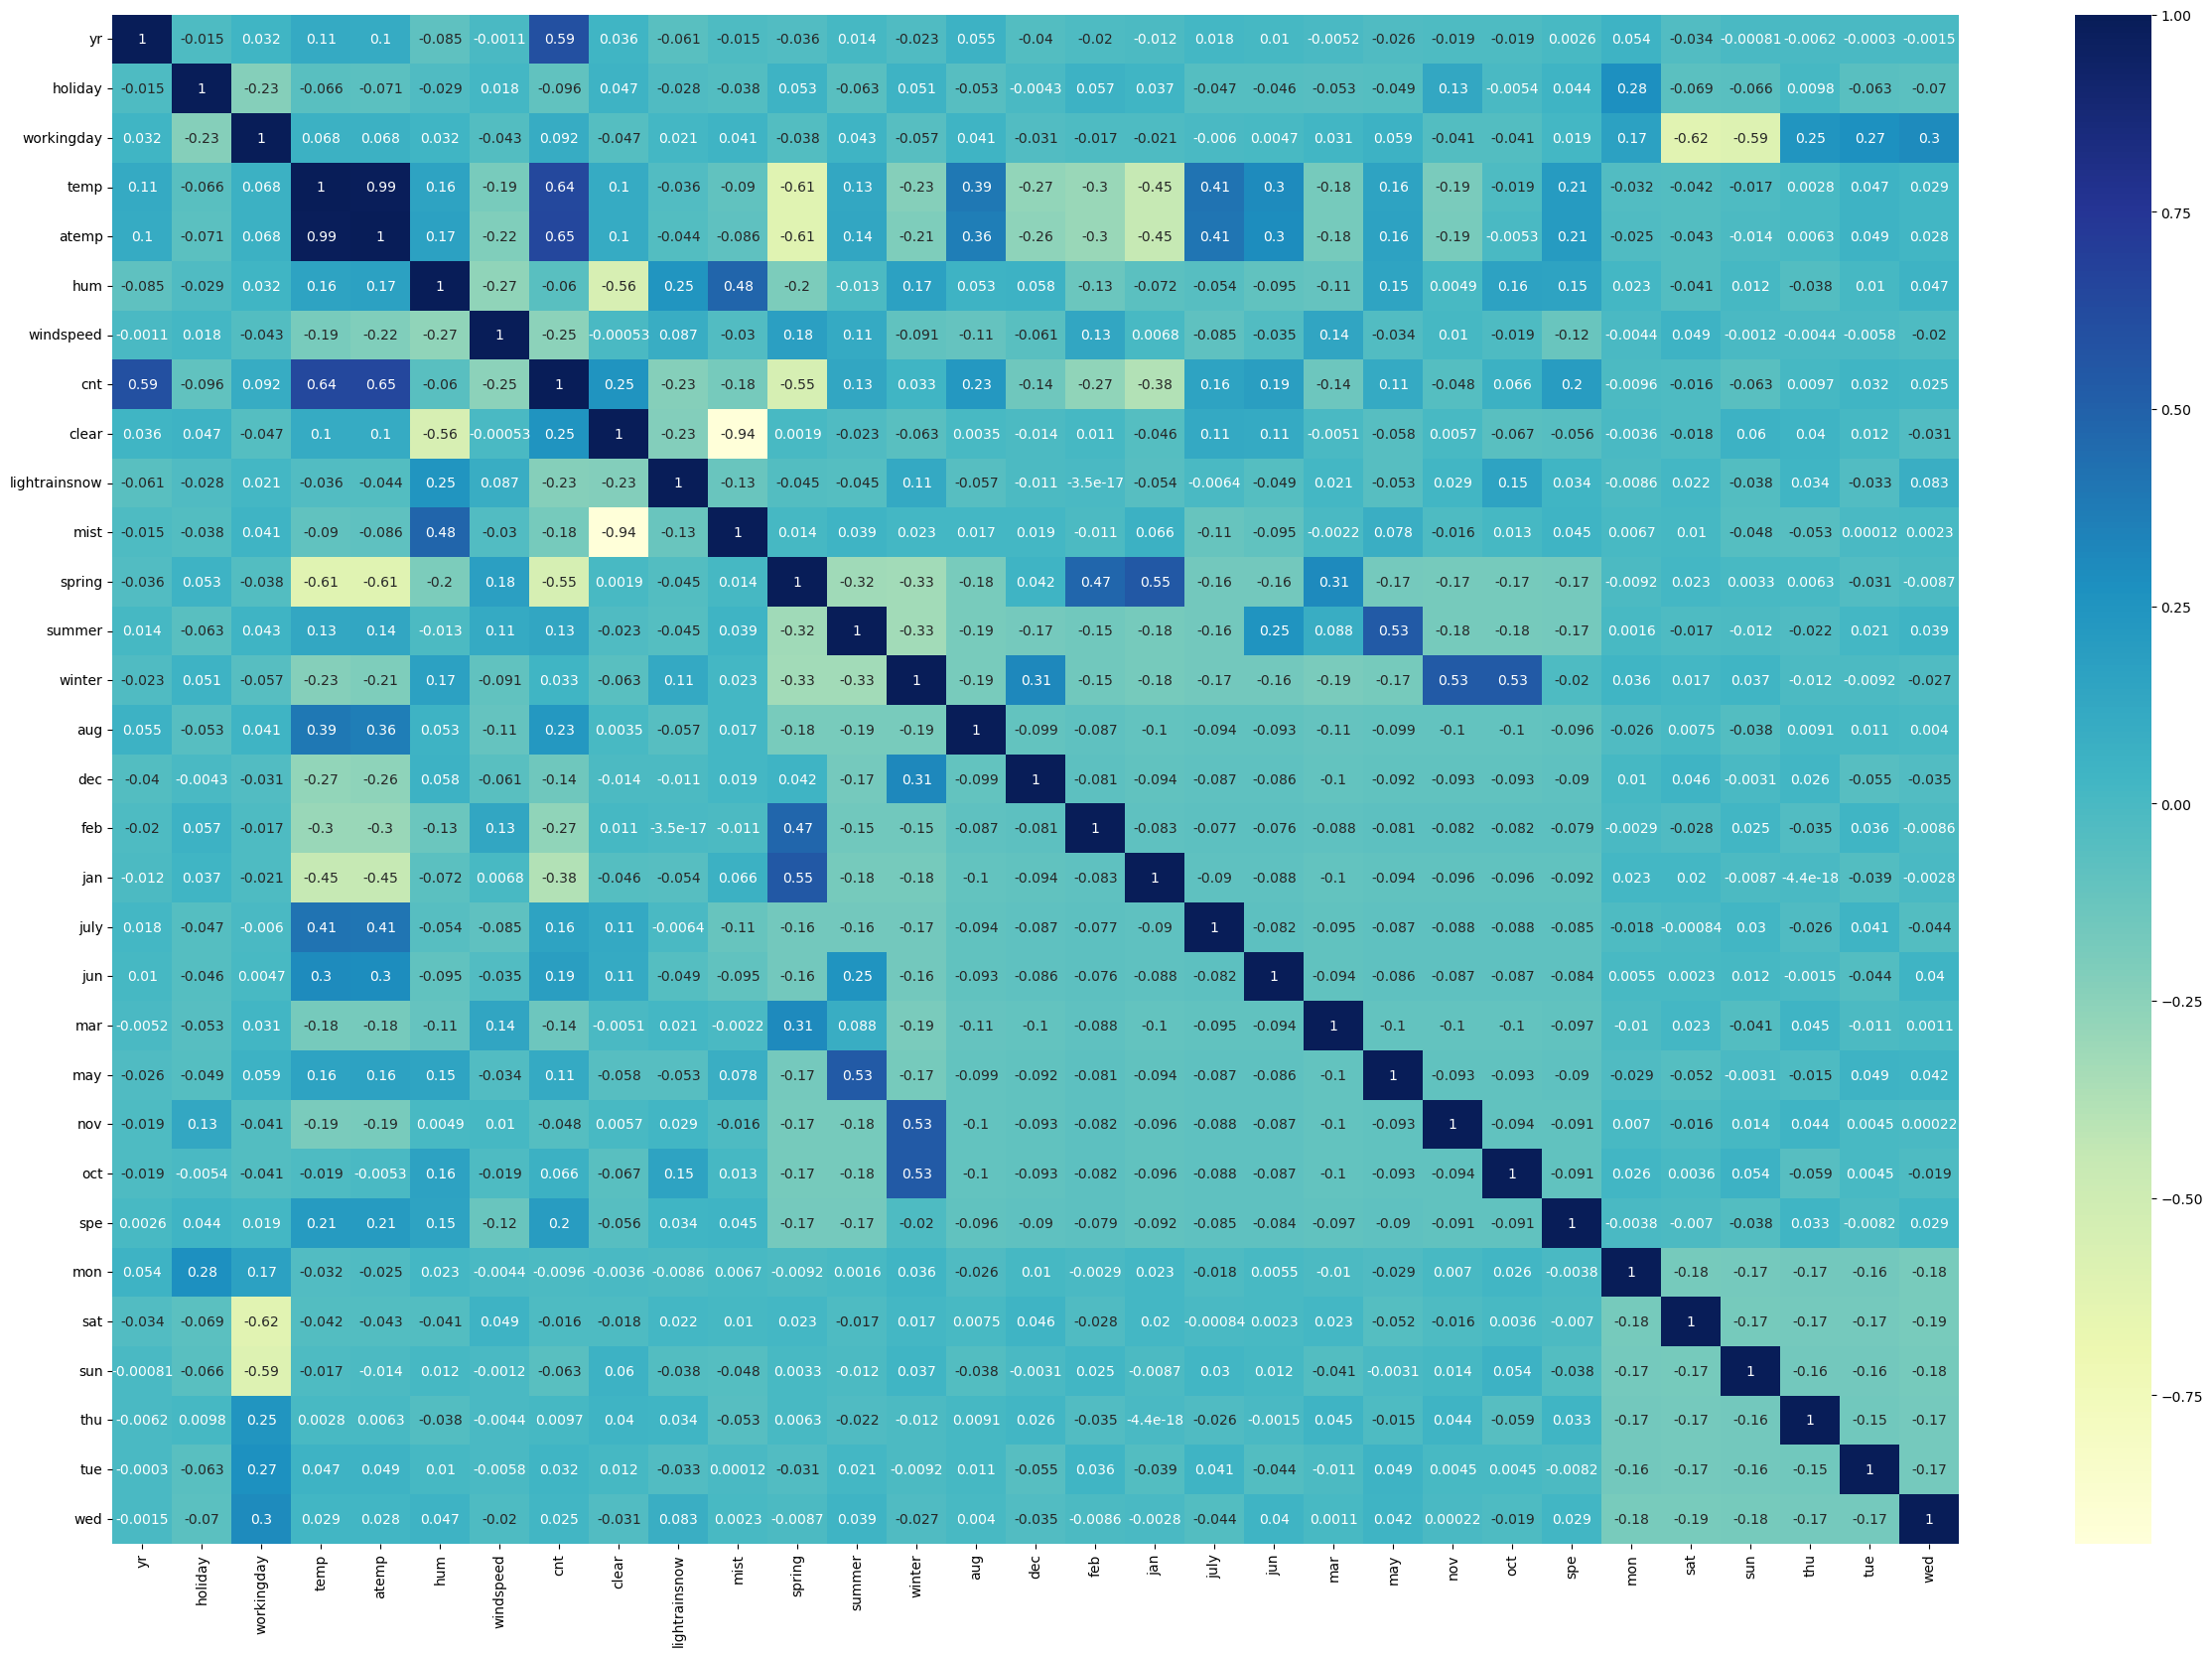

In [800]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Will refer to this heatmap back-and-forth to build liner model

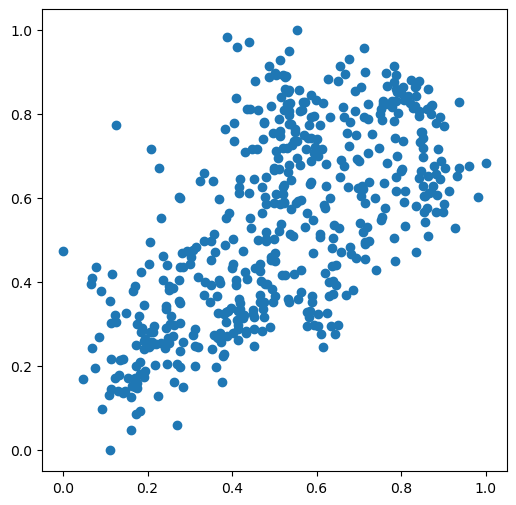

In [801]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.temp)
plt.show()

Above plot is showing very good linear relatioship between cnt and temp. This can be a good variable to start building linear model.

### Dividing into X and y for model building

In [802]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building Liner Model

In [803]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [804]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           5.80e-61
Time:                        14:32:22   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable
We have got R-squared value 0.414. Lets add second most correlated variable 'yr'

In [805]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr']])

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [806]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          9.25e-130
Time:                        14:32:34   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

Model has been improved as R-squared value has gone up to 0.690 from 0.414. Lets add next highest correlated variable.

In [807]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','clear']])

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [808]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     434.8
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          1.31e-139
Time:                        14:32:46   Log-Likelihood:                 363.57
No. Observations:                 510   AIC:                            -719.1
Df Residuals:                     506   BIC:                            -702.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0389      0.015      2.556      0.0

Model has been improved as R-squared value has gone up to 0.721 from 0.690. Lets add next highest correlated variable.

In [809]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','clear','windspeed']])

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     364.5
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          2.52e-147
Time:                        14:32:47   Log-Likelihood:                 384.70
No. Observations:                 510   AIC:                            -759.4
Df Residuals:                     505   BIC:                            -738.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1174      0.019      6.230      0.0

Model has been improved slightly as R-squared value has gone up to0.743 from 0.721. Lets add next highest correlated variable.

In [810]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','clear','windspeed','lightrainsnow']])

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     316.6
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          6.15e-153
Time:                        14:32:48   Log-Likelihood:                 400.86
No. Observations:                 510   AIC:                            -789.7
Df Residuals:                     504   BIC:                            -764.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1271      0.018      6.923

Model has been improved slightly. Lets add next highest correlated variable.

In [811]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','clear','windspeed','lightrainsnow','spring']])

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     362.5
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          4.81e-179
Time:                        14:32:49   Log-Likelihood:                 464.91
No. Observations:                 510   AIC:                            -915.8
Df Residuals:                     503   BIC:                            -886.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2449      0.019     12.922

Model has been improved as R-squared value has gone up to 0.812 from 0.759. Lets add next highest correlated variable.

In [812]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','clear','windspeed','lightrainsnow','spring','aug']])

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     311.0
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          5.24e-178
Time:                        14:32:50   Log-Likelihood:                 465.53
No. Observations:                 510   AIC:                            -915.1
Df Residuals:                     502   BIC:                            -881.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2417      0.019     12.612

Model has not improved with 'aug'. Not keeping that. Adding other variable.

In [813]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','clear','windspeed','lightrainsnow','spring','jan']])

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     317.0
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          1.03e-179
Time:                        14:32:51   Log-Likelihood:                 469.52
No. Observations:                 510   AIC:                            -923.0
Df Residuals:                     502   BIC:                            -889.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2569      0.019     13.371

Model has been improved slightly. R-squared value is up from 0.812 to 0.816. Lets add next highest correlated variable.

In [814]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','clear','windspeed','lightrainsnow','spring','jan','july']])

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     290.6
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          9.37e-183
Time:                        14:32:53   Log-Likelihood:                 479.65
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     501   BIC:                            -903.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2346      0.020     12.027

Model has been improved slightly. R-squared value is up from 0.816 to 0.823. Lets add next highest correlated variable.

In [815]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','clear','windspeed','lightrainsnow','spring','jan','july','spe','workingday']])

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.1
Date:                Sat, 27 Jul 2024   Prob (F-statistic):          6.85e-184
Time:                        14:32:55   Log-Likelihood:                 488.15
No. Observations:                 510   AIC:                            -954.3
Df Residuals:                     499   BIC:                            -907.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2226      0.020     11.131

Model has been improved slightly. R-squared value is up from 0.823 to 0.829. 

### Checking VIF
Now checking VIF of the added columns

In [816]:
X = X_train[['temp','yr','clear','windspeed','lightrainsnow','spring','jan','july','spe','workingday']]
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.43
3,windspeed,3.90
9,workingday,2.89
2,clear,2.75
5,spring,2.20
1,yr,2.05
6,jan,1.59
7,july,1.32
8,spe,1.20
4,lightrainsnow,1.09


Model is looking good now. p-values and VIF both are within acceptable range except for temp. But temp is having high correlation with cnt. So keeping temp in the model.

### Model Observations

lr_10 model coefficients:

- const             0.2226     
- temp              0.3743      
- yr                0.2359      
- clear             0.0801      
- windspeed        -0.1594      
- lightrainsnow    -0.1992      
- spring           -0.1314      
- jan              -0.0517      
- july             -0.0669      
- sep               0.0546
- workingday        0.0209  

#### F-statistics : 241.1 
We have got F-statistic value of 241 which is greater than 1. It states that overall model is significant.

The equation of best fitted line will be based on model lr_10:

cnt = 0.2226 + (temp * 0.3743) + (yr * 0.2359) + (clear * 0.0801) + (windspeed * -0.1594) + (lightrainsnow * -0.1992) + (spring * -0.1314) + (jan * -0.0517) + (july * -0.0669) + (sep * 0.0546) + (workingday * 0.0209) 


## Step 6: Residual Analysis

**Normally distributed error terms with 0 mean:** Checking if error terms are normally distributed

In [817]:
y_train_cnt = lr_10.predict(X_train_lm)

Text(0.5, 0, 'Errors')

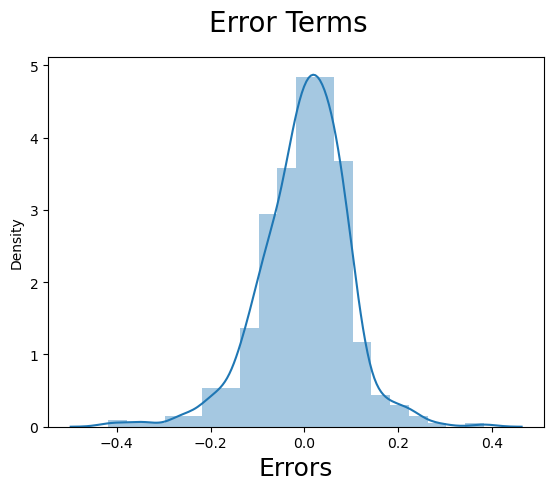

In [818]:
# Histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  

**Linear relationship between X and Y:** We have plotted pair plot above. In that we have seen linear relationshp exists between temp and predicted variable cnt.

**Error terms are independent of each other:** Plotting scatter plot between X_train and residual 

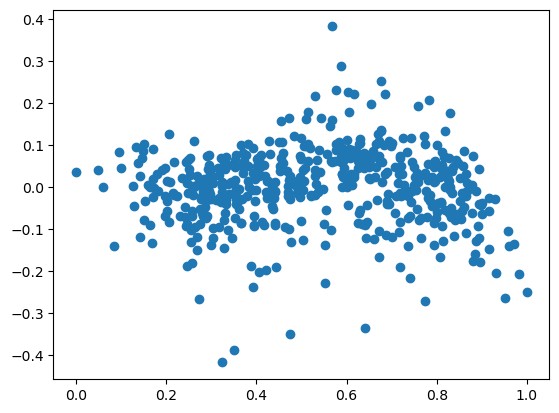

In [819]:
plt.scatter(X_train[['temp']], (y_train - y_train_cnt))
plt.show()

Error terms are independent and not showing any pattern in the above plot.

Observations : Linear regression assumptions are holding true for our model.

## Step 7: Making Predictions

Now we have the model and checked the normally distrubuted error terms, we can start predictions using final model.

### Apply scaling on the test data

In [820]:
# scaling numeric variables of test data
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,clear,lightrainsnow,...,may,nov,oct,spe,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


### Dividing test data into X_test and y_test

In [821]:
y_test = df_test.pop('cnt')
X_test = df_test

In [822]:
# Selecting the variables that were part of final model - lr_10.
final_cols = ['temp','yr','clear','windspeed','lightrainsnow','spring','jan','july','spe','workingday']
X_test=X_test[final_cols]

In [823]:
# Adding constant to test data

X_test_lr_10 = sm.add_constant(X_test)
X_test_lr_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   temp           219 non-null    float64
 2   yr             219 non-null    int64  
 3   clear          219 non-null    uint8  
 4   windspeed      219 non-null    float64
 5   lightrainsnow  219 non-null    uint8  
 6   spring         219 non-null    uint8  
 7   jan            219 non-null    uint8  
 8   july           219 non-null    uint8  
 9   spe            219 non-null    uint8  
 10  workingday     219 non-null    int64  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [824]:
# making prediction using final model lr_10
y_pred = lr_10.predict(X_test_lr_10)

## Step 8: Model Evaluation

Plotting graph for actual vs predicted values

Text(0, 0.5, 'y_pred')

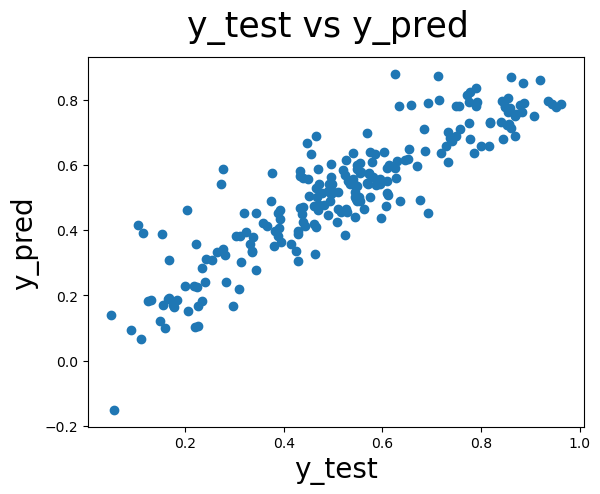

In [825]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 25)
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_pred', fontsize = 20)  

### R-squared value for test

In [826]:
r2_score(y_test, y_pred)

0.8006960558124135

### Comparison
- Train r-squared : 0.829
- Test r-squared : 0.80069


# Final Report

As per our final model, following are the top 3 predictors those influences the bike bookings:

- Temperature(temp) - Coefficient value of 0.3743 indicates that a unit increase in temperature increases the bike booking by 0.3743 units
- Year(yr) - Coefficient value of 0.2359 indicates that a unit increase in yr variable increases the bike booking by 0.2359 units
- Weather(lightrainsnow) - Coefficient value of -0.1992 indicates that a unit increase in lightrainsnow variable decreases the bike booking by 0.1992 units

Next few notable predictors are:

- windspeed - Coefficient value of -0.1594 indicates that a unit increase in windspeed variable decreases the bike booking by 0.1594 units
- Season(spring) - Coefficient value of -0.1314 indicates that during Spring the bike booking decreases by 0.1314 units

So, it is suggested to consider above variables while planning. 